# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [2]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO: Set up a connection the "Market.db" database
#conn = sqlite3.connect("Market.db")
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [4]:
#Products Table 
cursor.execute("""
    SELECT *
    FROM Products;
""")

rows = cursor.fetchall()
#print(rows)
for r in rows:
    print (r)

(1, 'Chais', 1, 1, '10 boxes x 20 bags', 18)
(2, 'Chang', 1, 1, '24 - 12 oz bottles', 19)
(3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10)
(4, "Chef Anton's Cajun Seasoning", 2, 2, '48 - 6 oz jars', 22)
(5, "Chef Anton's Gumbo Mix", 2, 2, '36 boxes', 21.35)
(6, "Grandma's Boysenberry Spread", 3, 2, '12 - 8 oz jars', 25)
(7, "Uncle Bob's Organic Dried Pears", 3, 7, '12 - 1 lb pkgs.', 30)
(8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40)
(9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97)
(10, 'Ikura', 4, 8, '12 - 200 ml jars', 31)
(11, 'Queso Cabrales', 5, 4, '1 kg pkg.', 21)
(12, 'Queso Manchego La Pastora', 5, 4, '10 - 500 g pkgs.', 38)
(13, 'Konbu', 6, 8, '2 kg box', 6)
(14, 'Tofu', 6, 7, '40 - 100 g pkgs.', 23.25)
(15, 'Genen Shouyu', 6, 2, '24 - 250 ml bottles', 15.5)
(16, 'Pavlova', 7, 3, '32 - 500 g boxes', 17.45)
(17, 'Alice Mutton', 7, 6, '20 - 1 kg tins', 39)
(18, 'Carnarvon Tigers', 7, 8, '16 kg pkg.', 62.5)
(19, 'Teatime Chocolate Biscuits', 8, 3, '10 boxe

In [5]:
#Products dataframe
columns = [desc[0] for desc in cursor.description]
products_df = pd.DataFrame(rows, columns=columns)
products_df


,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18.00
1,2,Chang,1,1,24 - 12 oz bottles,19.00
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35
...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75
75,76,Lakkalikööri,23,1,500 ml,18.00


In [6]:
# TODO: Write a SQL query which will answer the question above.
#products_df[products_df["Price"] < 10.00] #pandas methods

cursor.execute("""
SELECT COUNT(Price)
FROM Products
WHERE Price < 10;
""")

rows = cursor.fetchall()
print(rows)



[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country,  COUNT (Country)
    FROM Suppliers
    GROUP BY Country
    ORDER BY COUNT (Country) DESC
""")

# TODO: Fetch your list of tuples and print it out
rows_sup = cursor.fetchall()
columns_sup = [desc[0] for desc in cursor.description]
print(rows_sup)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


In [8]:
# TODO: Convert your list of tuples to a dataframe
country_count_df = pd.DataFrame(rows_sup, columns = columns_sup)
country_count_df

,Country,COUNT (Country)
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2
5,Japan,2
6,Italy,2
7,Canada,2
8,Australia,2
9,Spain,1


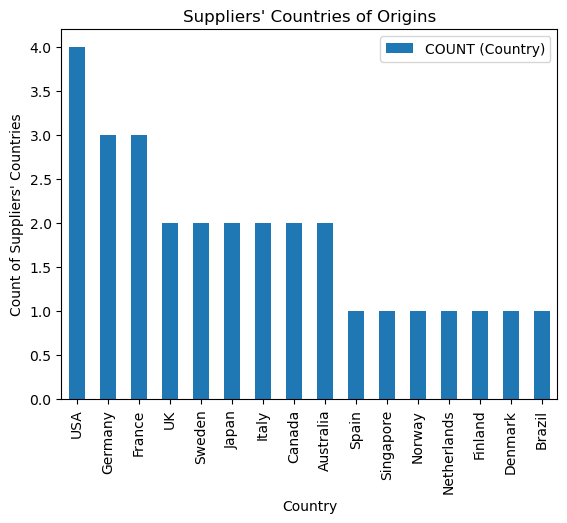

In [9]:
# TODO: Generate a visualization on this dataframe
#bar graph because there are categories

country_count_df.plot.bar(x= "Country")
plt.title("Suppliers' Countries of Origins")
plt.xlabel('Country')
plt.ylabel("Count of Suppliers' Countries")
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [10]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT (Country)
    FROM Customers
    GROUP BY Country
    ORDER BY COUNT (Country) DESC       
""")

# TODO: Fetch your list of tuples and print it out
rows_cus = cursor.fetchall()
columns_cus = [desc[0] for desc in cursor.description]
print(rows_cus)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


In [11]:
# TODO: Convert your list of tuples to a dataframe
cust_country_df = pd.DataFrame(rows_cus, columns= columns_cus)
cust_country_df


,Country,COUNT (Country)
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Spain,5
6,Mexico,5
7,Venezuela,4
8,Italy,3
9,Canada,3


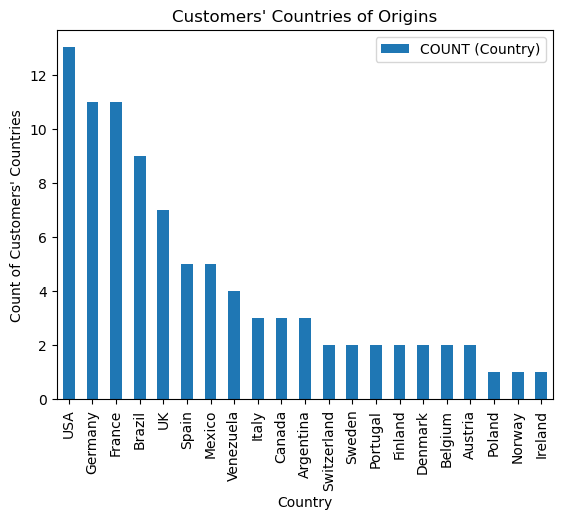

In [12]:
# TODO: Generate a visualization on this dataframe

cust_country_df.plot.bar(x= "Country")
plt.title("Customers' Countries of Origins")
plt.xlabel('Country')
plt.ylabel("Count of Customers' Countries")
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
#Joining OrderDetails and Products through primary key : ProductId

#SELECT DISTINCT p.ProductId, p.ProductName, od.Quantity
cursor.execute("""
    SELECT od.ProductId, p.ProductName, od.Quantity
    FROM Products AS p
    Inner JOIN OrderDetails AS od
    ON p.ProductId = od.ProductId
    ORDER BY Quantity 
    LIMIT 20;                             
""")

#innerjoin because you have to do multiple joins

# TODO: Fetch your list of tuples and print it out
rows_quant = cursor.fetchall()
columns_quant = [desc[0] for desc in cursor.description]
print(rows_quant)

[(37, 'Gravad lax', 1), (19, 'Teatime Chocolate Biscuits', 1), (69, 'Gudbrandsdalsost', 1), (56, 'Gnocchi di nonna Alice', 2), (57, 'Ravioli Angelo', 2), (51, 'Manjimup Dried Apples', 2), (71, 'Fløtemysost', 2), (42, 'Singaporean Hokkien Fried Mee', 2), (40, 'Boston Crab Meat', 2), (17, 'Alice Mutton', 2), (46, 'Spegesild', 2), (13, 'Konbu', 2), (26, 'Gumbär Gummibärchen', 2), (72, 'Mozzarella di Giovanni', 3), (68, 'Scottish Longbreads', 3), (68, 'Scottish Longbreads', 3), (71, 'Fløtemysost', 3), (72, 'Mozzarella di Giovanni', 4), (35, 'Steeleye Stout', 4), (56, 'Gnocchi di nonna Alice', 4)]


In [51]:
# TODO: Write a SQL query which will answer the question above.

#Joining OrderDetails and Products through primary key : ProductId
#No duplicates hopefully 
cursor.execute("""
    SELECT od.ProductId, p.ProductName, od.Quantity
    FROM Products AS p
    Inner JOIN OrderDetails AS od
    ON p.ProductId = od.ProductId
    GROUP BY p.ProductName
    ORDER BY Quantity 
    LIMIT 20;                             
""")

#innerjoin because you have to do multiple joins

#I'm getting stuck on grouping by product name or productid

# TODO: Fetch your list of tuples and print it out
rows_quant = cursor.fetchall()
columns_quant = [desc[0] for desc in cursor.description]
print(rows_quant)

[(37, 'Gravad lax', 1), (19, 'Teatime Chocolate Biscuits', 1), (56, 'Gnocchi di nonna Alice', 2), (68, 'Scottish Longbreads', 3), (25, 'NuNuCa Nuß-Nougat-Creme', 4), (67, 'Laughing Lumberjack Lager', 5), (72, 'Mozzarella di Giovanni', 5), (22, "Gustaf's Knäckebröd", 6), (32, 'Mascarpone Fabioli', 6), (63, 'Vegie-spread', 8), (14, 'Tofu', 9), (64, 'Wimmers gute Semmelknödel', 9), (41, "Jack's New England Clam Chowder", 10), (13, 'Konbu', 10), (42, 'Singaporean Hokkien Fried Mee', 10), (21, "Sir Rodney's Scones", 10), (29, 'Thüringer Rostbratwurst', 10), (54, 'Tourtière', 10), (18, 'Carnarvon Tigers', 12), (77, 'Original Frankfurter grüne Soße', 12)]


In [52]:
# TODO: Convert your list of tuples to a dataframe
prod_quant_df = pd.DataFrame(rows_quant, columns= columns_quant)
prod_quant_df


,ProductID,ProductName,Quantity
0,37,Gravad lax,1
1,19,Teatime Chocolate Biscuits,1
2,56,Gnocchi di nonna Alice,2
3,68,Scottish Longbreads,3
4,25,NuNuCa Nuß-Nougat-Creme,4
5,67,Laughing Lumberjack Lager,5
6,72,Mozzarella di Giovanni,5
7,22,Gustaf's Knäckebröd,6
8,32,Mascarpone Fabioli,6
9,63,Vegie-spread,8


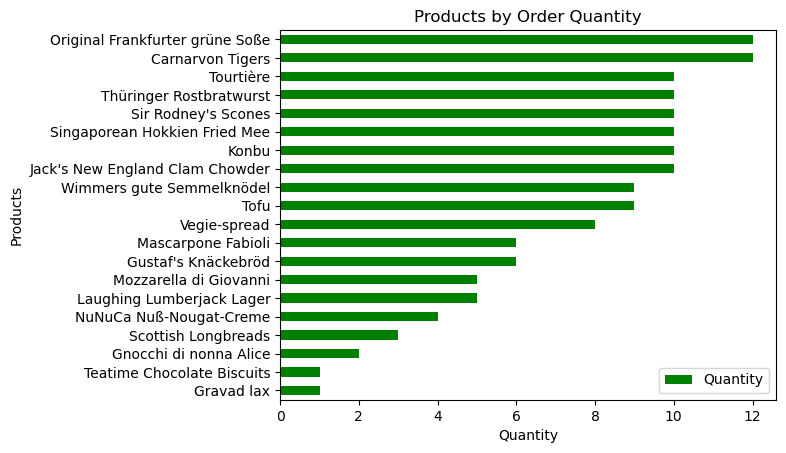

In [46]:
# TODO: Generate a visualization on this dataframe
prod_quant_df.plot.barh(x= "ProductName", y= "Quantity", color = "green")
plt.title("Products by Order Quantity")
plt.xlabel("Quantity")
plt.ylabel('Products')
plt.show()


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [47]:
# TODO: Write a SQL query which will answer the question above.
#Joining OrderDetails and Products through primary key : ProductId

cursor.execute("""
    SELECT od.ProductId, p.ProductName, od.Quantity, p.Price, (od.Quantity * p.Price) AS "Total Revenue"
    FROM Products AS p
    Inner JOIN OrderDetails AS od
    ON p.ProductId = od.ProductId
    GROUP BY P.ProductName
    ORDER BY "Total Revenue" 
    LIMIT 20
    ;                             
""")

# TODO: Fetch your list of tuples and print it out
rows_revenue = cursor.fetchall()
columns_revenue = [desc[0] for desc in cursor.description]
print(rows_revenue)

[(19, 'Teatime Chocolate Biscuits', 1, 9.2, 9.2), (37, 'Gravad lax', 1, 26, 26), (68, 'Scottish Longbreads', 3, 12.5, 37.5), (25, 'NuNuCa Nuß-Nougat-Creme', 4, 14, 56), (13, 'Konbu', 10, 6, 60), (33, 'Geitost', 25, 2.5, 62.5), (24, 'Guaraná Fantástica', 15, 4.5, 67.5), (67, 'Laughing Lumberjack Lager', 5, 14, 70), (54, 'Tourtière', 10, 7.45, 74.5), (56, 'Gnocchi di nonna Alice', 2, 38, 76), (41, "Jack's New England Clam Chowder", 10, 9.65, 96.5), (21, "Sir Rodney's Scones", 10, 10, 100), (22, "Gustaf's Knäckebröd", 6, 21, 126), (52, 'Filo Mix', 20, 7, 140), (42, 'Singaporean Hokkien Fried Mee', 10, 14, 140), (45, 'Røgede sild', 15, 9.5, 142.5), (47, 'Zaanse koeken', 16, 9.5, 152.0), (77, 'Original Frankfurter grüne Soße', 12, 13, 156), (72, 'Mozzarella di Giovanni', 5, 34.8, 174.0), (46, 'Spegesild', 15, 12, 180)]


In [ ]:
# TODO: Convert your list of tuples to a dataframe

total_rev_df = pd.DataFrame(rows_revenue, columns= columns_revenue)
total_rev_df



,ProductID,ProductName,Quantity,Price,Total Revenue
0,19,Teatime Chocolate Biscuits,1,9.20,9.2
1,37,Gravad lax,1,26.00,26.0
2,68,Scottish Longbreads,3,12.50,37.5
3,25,NuNuCa Nuß-Nougat-Creme,4,14.00,56.0
4,13,Konbu,10,6.00,60.0
5,33,Geitost,25,2.50,62.5
6,24,Guaraná Fantástica,15,4.50,67.5
7,67,Laughing Lumberjack Lager,5,14.00,70.0
8,54,Tourtière,10,7.45,74.5
9,56,Gnocchi di nonna Alice,2,38.00,76.0


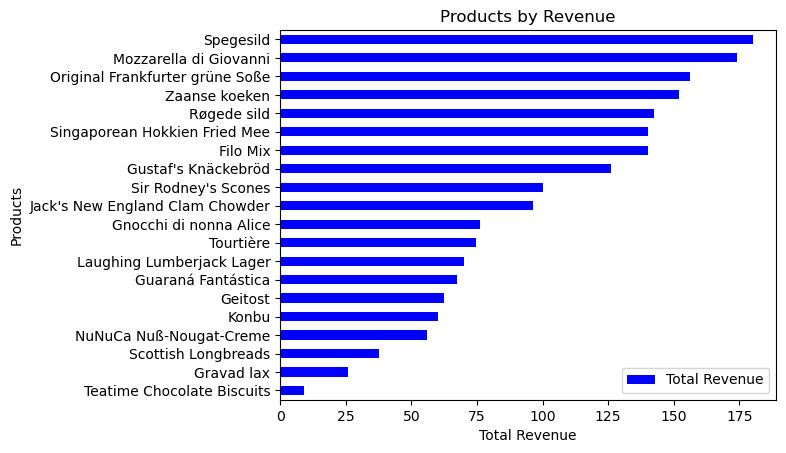

In [53]:
# TODO: Generate a visualization on this dataframe

total_rev_df.plot.barh(x= "ProductName", y= "Total Revenue", color = "blue")
plt.title("Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel('Products')
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.

#Not finished. Stuck on how to get the orders. Is it count of quantity?
cursor.execute("""
    SELECT od.ProductId, p.ProductName, od.Quantity, od.OrderID
    FROM Products AS p
    Inner JOIN OrderDetails AS od
    ON p.ProductId = od.ProductId
    GROUP BY od.OrderID
    LIMIT 20
    ;                             
""")

# TODO: Fetch your list of tuples and print it out
rows_orders = cursor.fetchall()
columns_orders = [desc[0] for desc in cursor.description]
print(rows_orders)

[(11, 'Queso Cabrales', 12, 10248), (14, 'Tofu', 9, 10249), (41, "Jack's New England Clam Chowder", 10, 10250), (22, "Gustaf's Knäckebröd", 6, 10251), (20, "Sir Rodney's Marmalade", 40, 10252), (31, 'Gorgonzola Telino', 20, 10253), (24, 'Guaraná Fantástica', 15, 10254), (2, 'Chang', 20, 10255), (53, 'Perth Pasties', 15, 10256), (27, 'Schoggi Schokolade', 25, 10257), (2, 'Chang', 50, 10258), (21, "Sir Rodney's Scones", 10, 10259), (41, "Jack's New England Clam Chowder", 16, 10260), (21, "Sir Rodney's Scones", 20, 10261), (5, "Chef Anton's Gumbo Mix", 12, 10262), (16, 'Pavlova', 60, 10263), (2, 'Chang', 35, 10264), (17, 'Alice Mutton', 30, 10265), (12, 'Queso Manchego La Pastora', 12, 10266), (40, 'Boston Crab Meat', 50, 10267)]


In [60]:
# TODO: Convert your list of tuples to a dataframe
orders_country_df = pd.DataFrame(rows_orders, columns= columns_orders)
orders_country_df

# TODO: Generate a visualization on this dataframe


,ProductID,ProductName,Quantity,OrderID
0,11,Queso Cabrales,12,10248
1,14,Tofu,9,10249
2,41,Jack's New England Clam Chowder,10,10250
3,22,Gustaf's Knäckebröd,6,10251
4,20,Sir Rodney's Marmalade,40,10252
5,31,Gorgonzola Telino,20,10253
6,24,Guaraná Fantástica,15,10254
7,2,Chang,20,10255
8,53,Perth Pasties,15,10256
9,27,Schoggi Schokolade,25,10257


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [20]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [21]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [22]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [23]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]